A list of useful resources:

Matplotlib pyplot.plot documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

List with all available fonts in Matplotlib: https://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/

List of colors: https://matplotlib.org/stable/gallery/color/named_colors.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from urllib.request import urlretrieve

In [2]:
# Listing the fonts that are available in your computer to be used with Matplotlib

import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

In [3]:
italy_covid_url = 'https://gist.githubusercontent.com/aakashns/f6a004fa20c84fec53262f9a8bfee775/raw/f309558b1cf5103424cef58e2ecb8704dcd4d74c/italy-covid-daywise.csv'
urlretrieve(italy_covid_url, 'italy-covid-daywise.csv')
covid_df = pd.read_csv('italy-covid-daywise.csv')
covid_df.head()

,date,new_cases,new_deaths,new_tests
0,2019-12-31,0.0,0.0,NaN
1,2020-01-01,0.0,0.0,NaN
2,2020-01-02,0.0,0.0,NaN
3,2020-01-03,0.0,0.0,NaN
4,2020-01-04,0.0,0.0,NaN


In [6]:
covid_df['total_cases'] = covid_df.new_cases.cumsum()
covid_df['total_deaths'] = covid_df.new_deaths.cumsum()
initial_tests = 935310
covid_df['total_tests'] = covid_df.new_tests.cumsum() + initial_tests

covid_df['date'] = pd.to_datetime(covid_df.date)

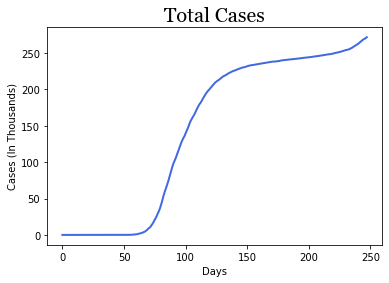

In [21]:
# A simple line plot

plt.plot(covid_df.total_cases/1000, linestyle='-', color='royalblue', linewidth=2)

plt.title('Total Cases', fontdict={'fontname':'Georgia', 'fontsize':20})
plt.xlabel('Days')
plt.ylabel('Cases (In Thousands)')

plt.xticks(np.arange(0, 300, step=50)) # np.arange does not include the endpoint

plt.show()

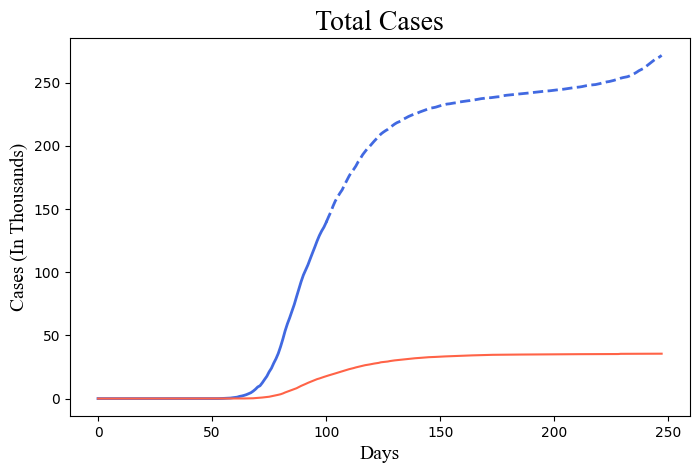

In [40]:
# Resizing figure
plt.figure(figsize=(8,5), dpi=100) # dpi = pixels per inch

# Line number 1
plt.plot(covid_df.total_cases[:101]/1000, linestyle='-', color='royalblue', linewidth=2)
plt.plot(covid_df.total_cases[100:]/1000, linestyle='--', color='royalblue', linewidth=2)

# Line number 2
plt.plot(covid_df.total_deaths/1000, color='tomato')

# Graph title
plt.title('Total Cases', fontdict={'fontname':'Times New Roman', 'fontsize':20})

# Axis titles and labels
plt.xlabel('Days', fontdict={'fontname':'Times New Roman', 'fontsize':14})
plt.ylabel('Cases (In Thousands)', fontdict={'fontname':'Times New Roman', 'fontsize':14})
plt.xticks(np.arange(0, 300, step=50)) # np.arange does not include the endpoint

# Saving figure
plt.savefig('mygraph.png') # You can also specify the dpi to adjust figure resolution

plt.show()